In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


EDA (Exploratory Data Analysis): En esta fase el objetivo es explorar y entender los datos. Es fundamental analizar patrones y características del dataset que puedan ofrecer insights útiles para mejorar el sistema de recomendaciones


In [23]:
# Cargar DataFrames desde el archivo Parquet

crew_df = pd.read_parquet('../Dataset_procesados/credits_crew.parquet')
cast_df = pd.read_parquet('../Dataset_procesados/credits_cast.parquet')
movies = pd.read_parquet('../Dataset_procesados/movies_modificado.parquet')


Análisis Exploratorio Inicial de movies_modificado.parquet

In [24]:
print(movies.head(3))

     budget  idMovies original_language  \
0  30000000       862                en   
1  65000000      8844                en   
2         0     15602                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          0.0    101.0  Released   

                                             tagline  ... vote_average  \
0                                         no summary  ...          7.7   
1          Roll the dice and unleash the excitement!  ...          6.9   
2  Still Yelling. Still Fighting. Still Ready for...  ...          6.5   

   vote_count  id_genres     genres     production_compa

Se muestran las 3 primeras filas del dataset 

In [25]:
# Obtener información general del DataFrame
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  int64         
 1   idMovies              45346 non-null  int32         
 2   original_language     45346 non-null  object        
 3   overview              45346 non-null  object        
 4   popularity            45346 non-null  float64       
 5   release_date          45346 non-null  datetime64[ns]
 6   revenue               45346 non-null  float64       
 7   runtime               45346 non-null  float64       
 8   status                45346 non-null  object        
 9   tagline               45346 non-null  object        
 10  title                 45346 non-null  object        
 11  vote_average          45346 non-null  float64       
 12  vote_count            45346 non-null  float64       
 13  id_genres            

Con este comando se observa que el  DataFrame movies contiene 45,345 entradas (filas) y con un total de 30 columnas
con distintos tipos de datos como: int64: con 8 columnas / float64: con 6 columnas / object: 16 columnas


In [26]:
# Describir estadísticamente los datos numéricos
print(movies.describe())

             budget       idMovies    popularity  \
count  4.534600e+04   45346.000000  45346.000000   
mean   4.232580e+06  108042.219645      2.926188   
min    0.000000e+00       2.000000      0.000000   
25%    0.000000e+00   26390.250000      0.388732   
50%    0.000000e+00   59852.500000      1.130176   
75%    0.000000e+00  156601.500000      3.689337   
max    3.800000e+08  469172.000000    547.488298   
std    1.744373e+07  112187.326746      6.010970   

                        release_date       revenue       runtime  \
count                          45346  4.534600e+04  45346.000000   
mean   1992-05-16 07:38:33.253649664  1.123366e+07     93.666895   
min              1874-12-09 00:00:00  0.000000e+00      0.000000   
25%              1978-10-06 00:00:00  0.000000e+00     85.000000   
50%              2001-08-30 00:00:00  0.000000e+00     95.000000   
75%              2010-12-17 00:00:00  0.000000e+00    107.000000   
max              2020-12-16 00:00:00  2.787965e+09   12

El comando anterior nos muestra un resumen estadístico de las columnas numéricas en el DataFrame movies. que nos dice: 
** budget: El presupuesto promedio de las películas es aproximadamente 4.23 millones de dólares. La mayoría de las películas tienen un presupuesto de 0 (probablemente para películas que no tienen presupuesto reportado), y el presupuesto máximo registrado es de 380 millones de dólares.
** popularity: La popularidad media de las películas es 2.93, con un rango muy amplio desde 0 hasta 547.49. La desviación estándar alta indica una gran variabilidad en la popularidad de las películas.

** release_date: La fecha de lanzamiento muestra un rango extenso desde 1874 hasta 2020.

** revenue: Los ingresos promedio son alrededor de 11.23 millones de dólares. Similar al presupuesto, hay un rango muy amplio desde 0 hasta más de 2.78 mil millones de dólares, con una alta desviación estándar.

** runtime: La duración promedio de las películas es de aproximadamente 93.67 minutos

** vote_average: La calificación promedio es 5.62, con valores que oscilan entre 0 y 10, indicando que las películas reciben calificaciones variadas.

** vote_count: El número promedio de votos es 110.14, con un rango que va de 0 a 14,075, mostrando una gran variabilidad en la cantidad de votos recibidos.

** return: La columna de retorno de inversión (ROI) tiene un promedio de 660.48, con un rango que va desde 0 hasta 12,396,380.00.

In [27]:
# Identificar valores nulos
print(movies.isnull().sum())

budget                  0
idMovies                0
original_language       0
overview                0
popularity              0
release_date            0
revenue                 0
runtime                 0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
id_genres               0
genres                  0
production_companies    0
id_production           0
production_countries    0
spoken_language         0
release_year            0
return                  0
dtype: int64


Sin Valores Nulos: El DataFrame está completo en cuanto a los valores no nulos que ya han sido tratados en el ETL, lo que simplifica el análisis posterior ya que no es necesario manejar valores faltantes.

Análisis de Outliers

Los outliers (valores atípicos) pueden distorsionar el análisis, por lo que es importante identificarlos. 

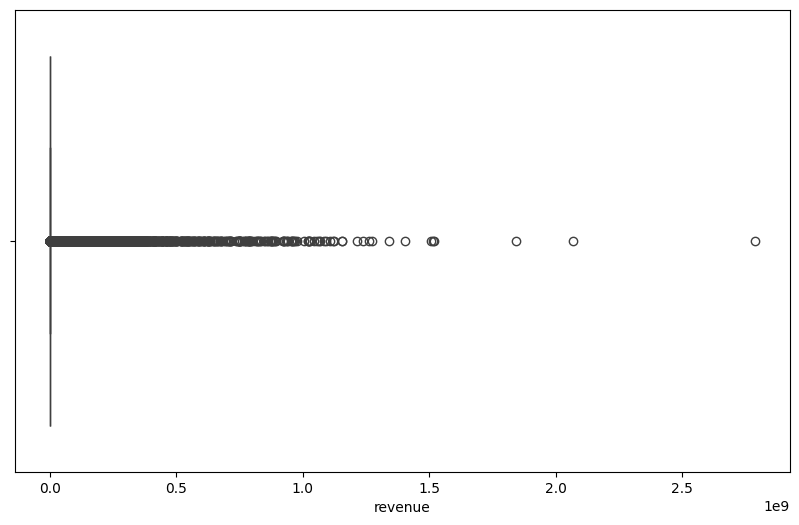

In [28]:
# Boxplot para detectar outliers en una columna 'revenue'
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['revenue'])
plt.show()

Segun este diagrama de caja la mayoría de las películas tienen ingresos muy bajos, pero unas pocas tienen ingresos extremadamente altos. Esto es un indicativo de una distribución asimétrica (posiblemente sesgada a la derecha).

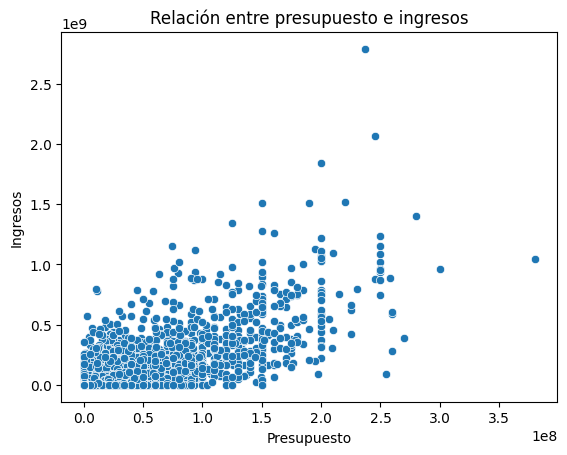

In [29]:
sns.scatterplot(x='budget', y='revenue', data=movies)
plt.title('Relación entre presupuesto e ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

Outliers:

Hay algunos puntos que sobresalen del grupo principal en la parte superior derecha del gráfico. Estos representan películas con presupuestos y recaudaciones extremadamente altos, posiblemente grandes éxitos de taquilla. Pero en general, se observa una correlación positiva entre el presupuesto y los ingresos

In [30]:
# Detectar outliers usando el método IQR
Q1 = movies['revenue'].quantile(0.25)
Q3 = movies['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = movies[(movies['revenue'] < (Q1 - 1.5 * IQR)) | (movies['revenue'] > (Q3 + 1.5 * IQR))]
print(outliers)

         budget  idMovies original_language  \
0      30000000       862                en   
1      65000000      8844                en   
3      16000000     31357                en   
4             0     11862                en   
5      60000000       949                en   
...         ...       ...               ...   
45399    750000    280422                ru   
45401         0    240789                ru   
45409    800000     62757                en   
45412   2000000     63281                en   
45422   5000000     63898                ru   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
5      Obsessive master thief, Neil McCauley leads a ...   17.924927   
...

Se han identificado 7,397 filas como outliers en la columna revenue, lo que representa una porción significativa del DataFrame (aproximadamente el 16% de las filas).
La presencia de un número significativo de outliers sugiere que hay una alta variabilidad en los ingresos reportados. Esto puede ser indicativo de un rango muy amplio de ingresos en las películas, posibles datos erróneos o películas con ingresos extremadamente altos o bajos. 

Análisis de variables 

***

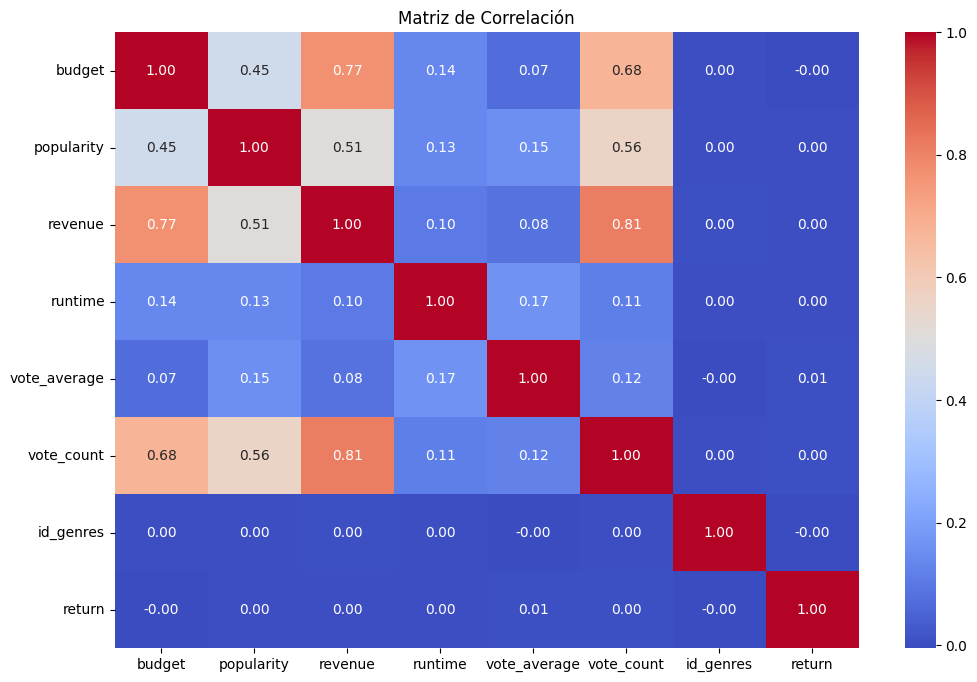

In [31]:
# columnas numéricas
numeric_columns = movies.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Observaciones de la matriz de correlacion:
Presupuesto (budget) está correlacionado de manera significativa con varias variables: popularity, revenue, y vote_count, lo que subraya su importancia en el rendimiento de las películas.
Ingreso (revenue) está fuertemente correlacionado con budget y vote_count, lo que indica que un mayor presupuesto generalmente conduce a mayores ingresos y un mayor número de votos.
Retorno (return) no muestra una correlación significativa con ninguna de las variables en esta matriz, lo que puede indicar que otros factores no incluidos en esta matriz afectan el retorno de inversión.

Analisis del Numero de Peliculas por año 

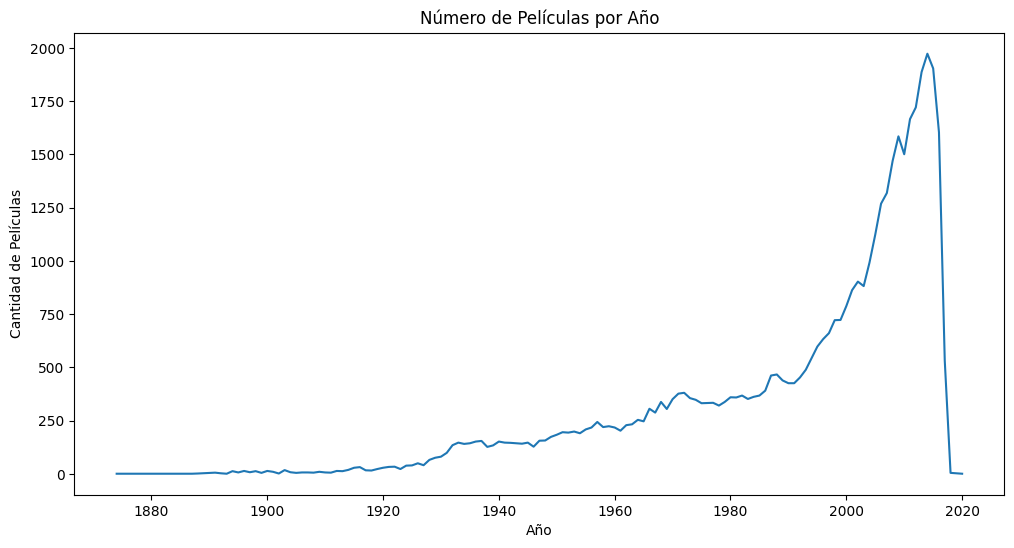

In [32]:
# Convertir 'release_date' a datetime si aún no está en formato datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Agrupar por año y contar el número de películas
movies['release_year'] =movies['release_date'].dt.year
movies.groupby('release_year').size().plot(kind='line', figsize=(12, 6))
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()



En este grafico se puede observar que en el año 2020 se estrenaron mayor cantidad de peliculas

Ahora podemos generar graficos de barra de estrenos por mes y dia

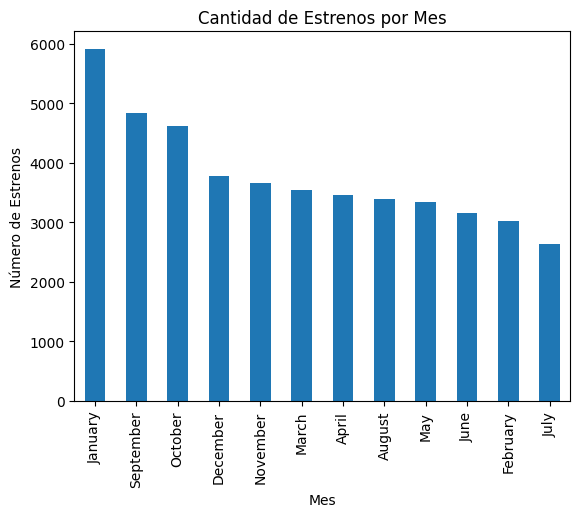

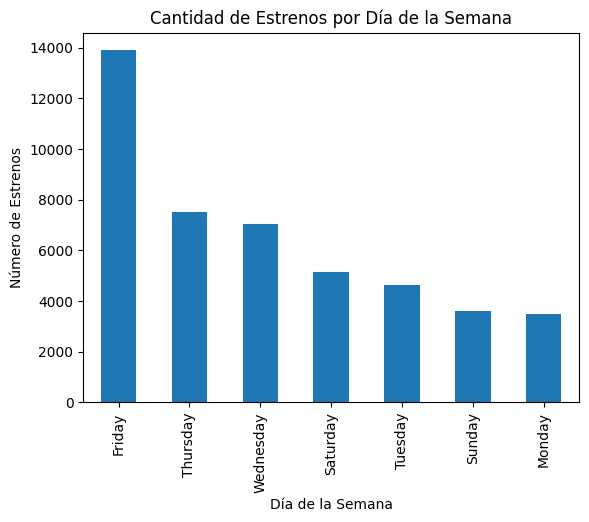

In [33]:
# Distribución de Estrenos por Mes 
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['month'] = movies['release_date'].dt.month_name()
movies['day_of_week'] = movies['release_date'].dt.day_name()

# Cantidad de estrenos por mes
movies['month'].value_counts().plot(kind='bar')
plt.title('Cantidad de Estrenos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Estrenos')
plt.show()

# Cantidad de estrenos por día de la semana
movies['day_of_week'].value_counts().plot(kind='bar')
plt.title('Cantidad de Estrenos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Estrenos')
plt.show()


El gráfico muestra que enero es el mes con el mayor número de estrenos, alcanzando casi 6,000. Además, los viernes son los días con más lanzamientos, con un promedio cercano a 14,000 estrenos por día.

Análisis de Puntuaciones y Votos:

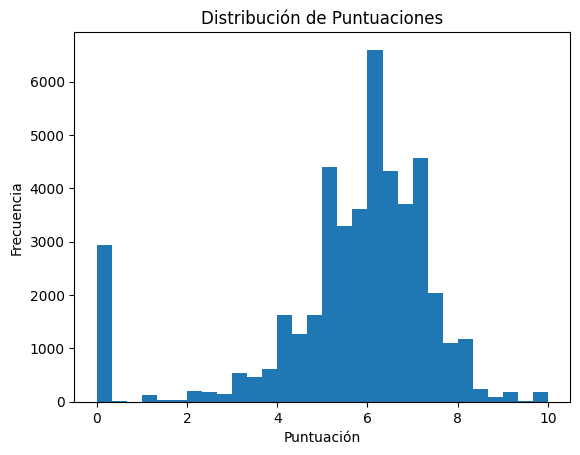

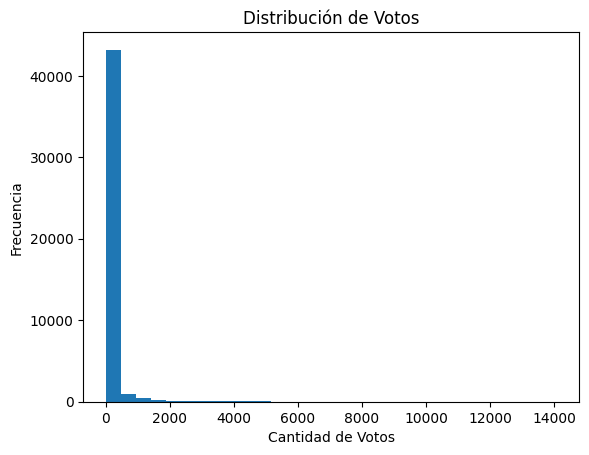

In [34]:

# Histograma de puntuaciones
movies['vote_average'].plot(kind='hist', bins=30)
plt.title('Distribución de Puntuaciones')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de votos
movies['vote_count'].plot(kind='hist', bins=30)
plt.title('Distribución de Votos')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Frecuencia')
plt.show()


In [24]:
#Percentiles
percentiles_vote_count = movies['vote_count'].quantile([0.25, 0.5, 0.75])
percentiles_vote_count

0.25     3.0
0.50    10.0
0.75    34.0
Name: vote_count, dtype: float64

El primer histograma muestra cómo se distribuyen las puntuaciones promedio (vote_average) de las películas. La mayoría de las películas tienden a tener puntuaciones dentro de un rango intermedio.

el segundo histograma la mayoría de las películas en el dataset reciben pocos votos, con el 50% de ellas recibiendo 10 votos o menos. Solo un cuarto de las películas superan los 34 votos, lo que indica que un pequeño grupo de películas obtiene una mayor participación del público.

Análisis de la participación de actores: en este apartado se cuentan las películas donde ha protagonizado o participado cada actor. 
Esto podría ayudar a identificar actores prolíficos o su relación con películas exitosas.

In [11]:
# Unir los datasets en base al ID de la película
merged_df = pd.merge(movies, cast_df, left_on='idMovies', right_on='idMovies', how='inner')

name_actor
Samuel L. Jackson     26
Steve Buscemi         26
Demi Moore            25
Whoopi Goldberg       25
Bess Flowers          23
Robert De Niro        23
Joan Cusack           23
Sylvester Stallone    22
Alfred Hitchcock      22
Dan Aykroyd           22
Name: title, dtype: int64


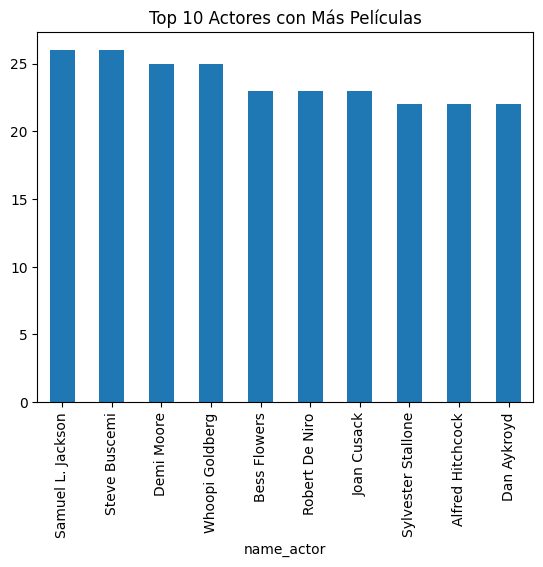

In [12]:
# Contar el número de películas por actor
actor_counts = merged_df.groupby('name_actor')['title'].count().sort_values(ascending=False)

# Ver los actores más prolíficos
print(actor_counts.head(10))

# Visualización
actor_counts.head(10).plot(kind='bar', title='Top 10 Actores con Más Películas')
plt.show()


se puede deducir que tanto Samuel L. Jackson como Steve Buscemi han participado en 26 películas.
y asi le siguen otros actores en un rango de 20 a 25 peliculas

•	Análisis del éxito de actores: Relaciona los actores con el éxito de las películas en las que han participado (por ejemplo, el retorno de inversión o la popularidad).
Ejemplo: ¿Cuáles son los actores que generan más ingresos promedio por película?


In [27]:
# Agrupar por actor y calcular el promedio del retorno de inversión o popularidad
actor_return = merged_df.groupby('name_actor')['return'].mean().reset_index()

# Ordenar de mayor a menor por el retorno promedio
actor_return_sorted = actor_return.sort_values(by='return', ascending=False)

# Mostrar los 10 actores con mayor retorno promedio
top_actors = actor_return_sorted.head(10)
print(top_actors)


                 name_actor        return
4381         Clive Merrison  4.132128e+06
14930         Leslie Howard  2.098738e+06
18187        Neal McDonough  1.700000e+06
23838       Thomas Mitchell  4.592643e+05
17311       Michael McGlone  3.395402e+05
16806     Maureen Stapleton  1.666667e+05
14821          Leo Carrillo  2.688172e+04
16859            Max Linder  1.289039e+04
23414         Sylvie Lenoir  2.216690e+03
1586   Arthur J. Nascarella  6.888889e+02


C:\Users\evely\AppData\Local\Temp\ipykernel_6160\4070512274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='return', y='name_actor', data=top_actors, palette='viridis')


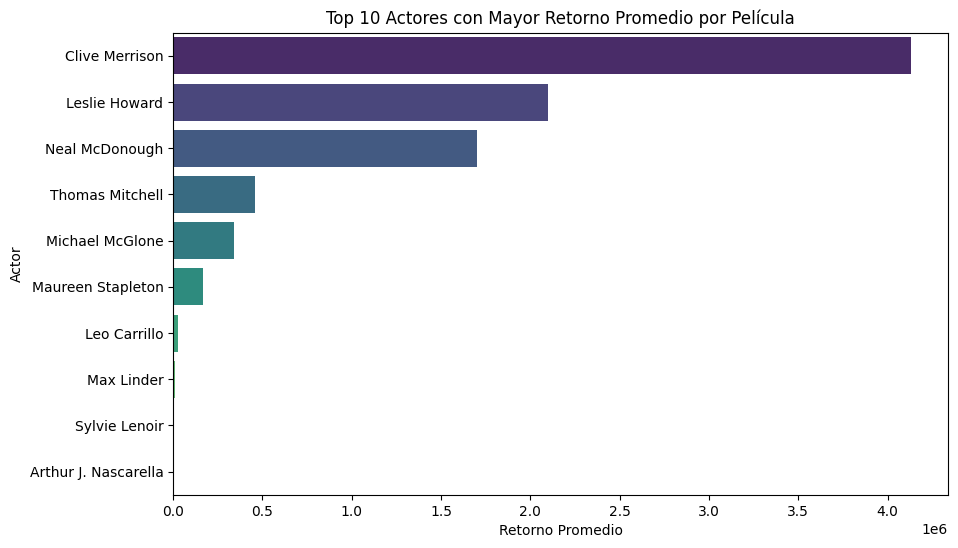

In [28]:
# Crear un gráfico de barras de los actores con mayor retorno promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='return', y='name_actor', data=top_actors, palette='viridis')
plt.title('Top 10 Actores con Mayor Retorno Promedio por Película')
plt.xlabel('Retorno Promedio')
plt.ylabel('Actor')
plt.show()

Se puede deducir que Clive Merrison se destaca con un retorno de inversión promedio de aproximadamente 4.13 millones, lo que indica que las películas en las que participa generan, en promedio, un ROI excepcionalmente alto. Este resultado podría sugerir que las películas con su participación son extremadamente rentables.

Calcular el Retorno Promedio por Director

In [13]:
# Unir los datasets en base al ID de la película
merged_df = pd.merge(movies, crew_df, left_on='idMovies', right_on='idMovies', how='inner')

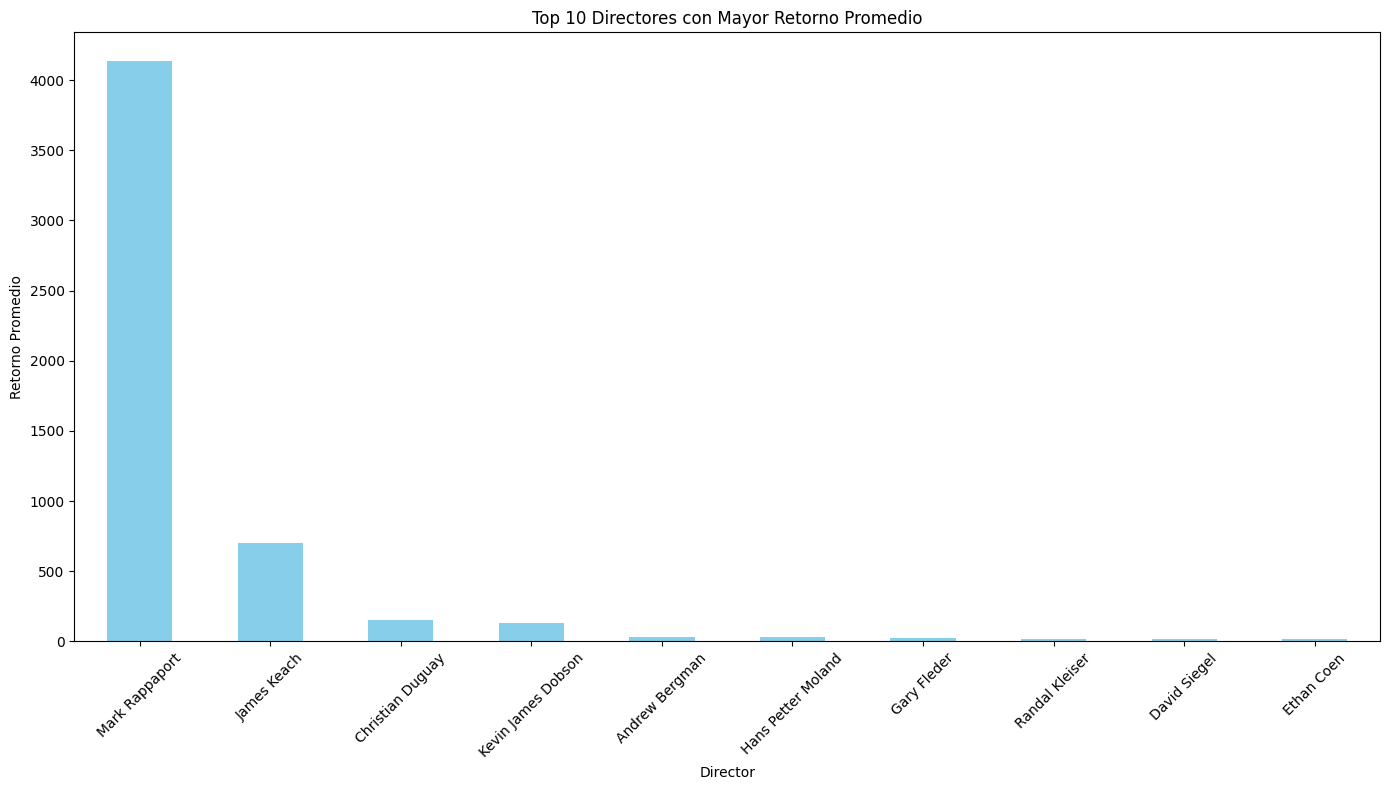

In [14]:
# Filtrar solo los directores
directors_df = merged_df[merged_df['crew_job'] == 'Director']

# Calcular el retorno promedio por director
average_return_by_director = directors_df.groupby('crew_name')['return'].mean().sort_values(ascending=False)
# Seleccionar los 10 directores con mayor retorno promedio
top_10_directors = average_return_by_director.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))  # Ajusta el tamaño según sea necesario
top_10_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directores con Mayor Retorno Promedio')
plt.xlabel('Director')
plt.ylabel('Retorno Promedio')
plt.xticks(rotation=45)  # Ajusta la rotación para mejorar la legibilidad
plt.tight_layout()  # Ajusta el diseño para que las etiquetas se muestren correctamente
plt.show()

Se puede concluir que el director Mark Rappaport lidera con un retorno promedio de aproximadamente 4,133.33, lo que indica que las películas que ha dirigido generan, en promedio, un retorno significativamente alto. Esto puede sugerir que sus proyectos tienden a ser muy exitosos o están en nichos que generan altos ingresos.


Frecuencia de Géneros en las Películas

C:\Users\evely\AppData\Local\Temp\ipykernel_2888\2685927136.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


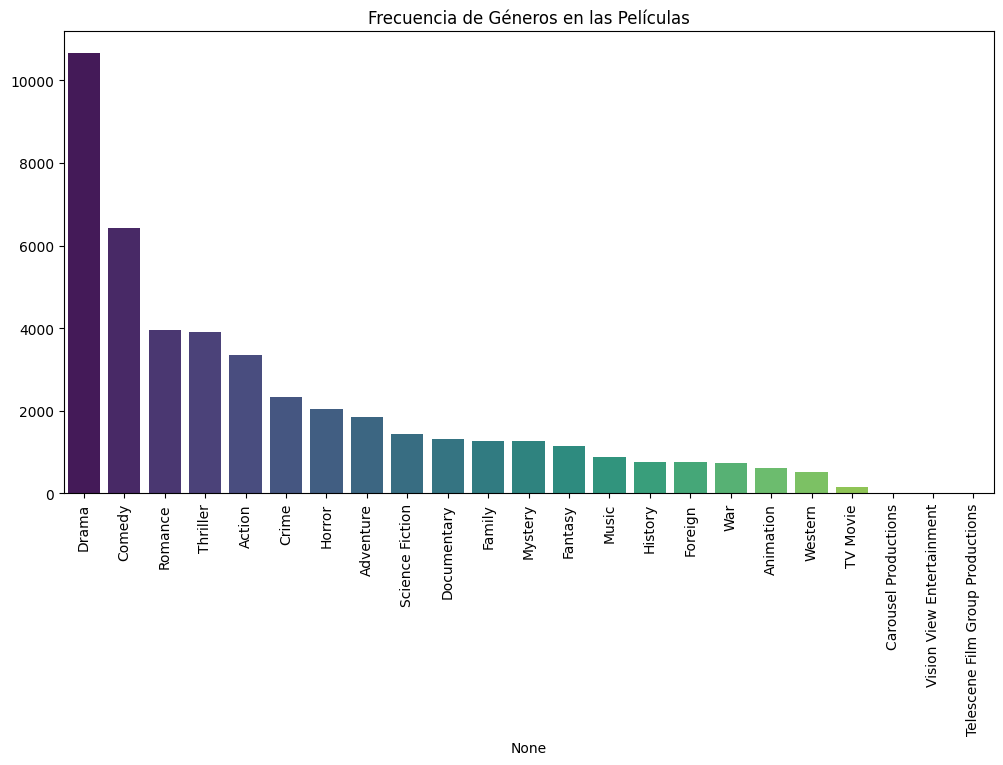

In [15]:
# Dividir los géneros y contarlos
movies['genres'] = movies['genres'].str.split(", ")

# Filtrar los valores nulos (None) de la lista de géneros
all_genres = [genre for sublist in movies['genres'].dropna() for genre in sublist if genre is not None]

# Crear el conteo de géneros
genre_counts = pd.Series(all_genres).value_counts()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frecuencia de Géneros en las Películas')
plt.xticks(rotation=90)
plt.show()


Se puede observar en esta grafica que el genero mas frecuente es el de Drama seguido de comedia y otros con menos frecuencia

Nube de palabras 
Nos puede ayudar a identificar las palabras clave que aparecen con mayor frecuencia en los títulos de películas y nos puede ofrecer insights sobre los datos textuales, ayudando a entender mejor las tendencias y preferencias.

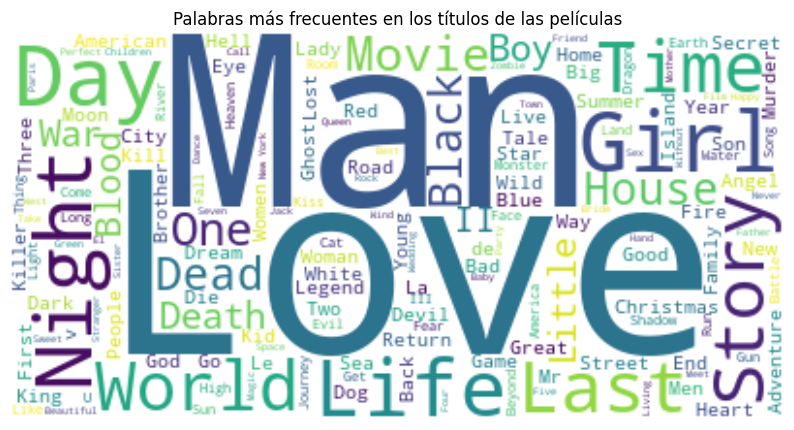

In [16]:
# Preparar los datos
titles = movies['title'].dropna().tolist()
text = ' '.join(titles)

# Generar la nube de palabras
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más frecuentes en los títulos de las películas")
plt.show()

Modelo de recomendacion de peliculas 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Nos aseguramos
#  de que el campo 'genres' sea una lista de cadenas
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Combina el título, géneros, idioma y overview en una sola columna
movies['combined_features'] = movies['title'] + " " + movies['genres'] + " " + movies['original_language'] + " " + movies['overview']

# Vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['combined_features'].fillna(''))

def recomendar_peliculas(titulo_pelicula, num_recomendaciones=5):
    # Obtener el índice de la película
    idx = movies[movies['title'] == titulo_pelicula].index[0]
    
    # Calcular la similitud con todas las demás películas
    cosine_similarities = cosine_similarity(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()
    
    # Obtener los índices de las películas más similares
    similar_indices = cosine_similarities.argsort()[-num_recomendaciones-1:-1][::-1]
    
    # Obtener los nombres de las películas más similares
    similar_movies = movies.iloc[similar_indices]['title'].tolist()
    return similar_movies

# Ejemplo de uso
print(recomendar_peliculas('Toy Story'))


['Toy Story 3', 'Toy Story 2', 'The 40 Year Old Virgin', 'Small Fry', "Andy Hardy's Blonde Trouble"]


Este código implementa un sistema de recomendación de películas utilizando la similitud del contenido basado en TF-IDF (Term Frequency-Inverse Document Frequency) y cosine similarity.

Preprocesamiento de Datos:

** Unificación de características: Se combinan varias columnas de texto (title, genres, original_language, overview) en una sola columna llamada combined_features. Esto crea una descripción más completa de cada película para mejorar la calidad de la recomendación.

** Conversión de listas a cadenas: Para los géneros (genres), que son listas de palabras, se convierten en una sola cadena para facilitar la concatenación con otras características de texto.

**Vectorización TF-IDF: El texto combinado se convierte en una matriz TF-IDF usando TfidfVectorizer. Esta matriz representa la importancia de cada palabra en las descripciones de las películas, reduciendo la influencia de palabras comunes.

**Cálculo de Similitud: e calcula la similitud coseno entre la película consultada y todas las demás películas en el conjunto de datos usando cosine_similarity. Esta métrica mide la similitud entre dos vectores de texto.

** Recomendación de Películas: Se identifican las películas con las descripciones más similares a la película consultada. Las películas más similares se devuelven como recomendaciones.

Nota: no se aplicaron las mismas combinaciones de columnas que la funcion de recomendacion.py con el fin de ver la diferencia entre ambas y pude observar que es minima 